###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

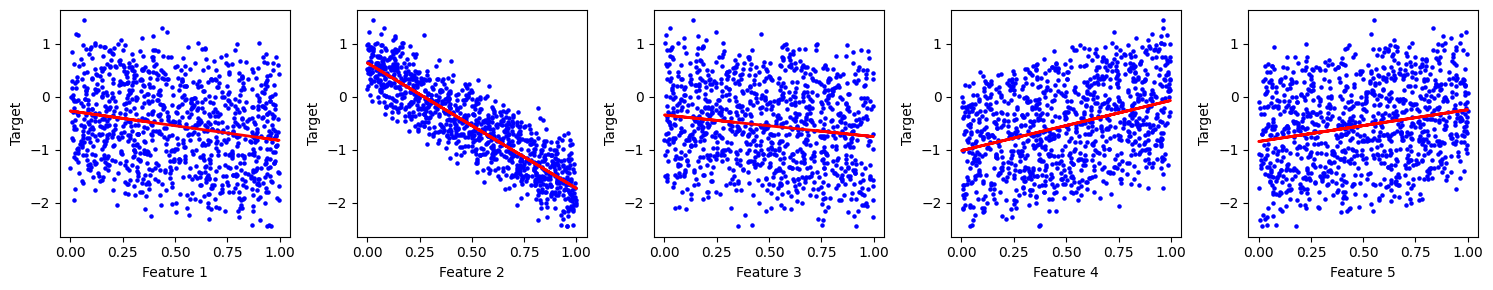

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
num_samples = 1000
num_features = 5

# Generate feature matrix
X = np.random.rand(num_samples, num_features)

# Generate target variable
true_coeffs = np.random.randn(num_features)
true_intercept = np.random.randn()
y = np.dot(X, true_coeffs) + true_intercept

# Plot the target column against each feature column
fig, axs = plt.subplots(1, num_features, figsize=(15, 3))

for i in range(num_features):
    axs[i].scatter(X[:, i], y, s=5, color='blue')
    axs[i].set_xlabel(f'Feature {i+1}')
    axs[i].set_ylabel('Target')

    # Calculate the best fit line using linear regression
    coeffs = np.polyfit(X[:, i], y, 1)
    best_fit_line = np.poly1d(coeffs)
    axs[i].plot(X[:, i], best_fit_line(X[:, i]), color='red', linewidth=2)

plt.tight_layout()
plt.show()


### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

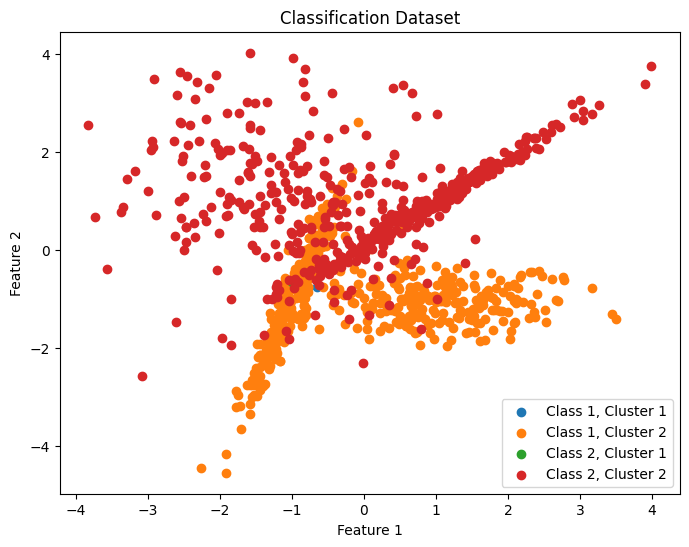

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Set random seed for reproducibility
np.random.seed(42)

# Generate the classification dataset
num_samples = 1000
num_features = 2
num_classes = 2
num_clusters = 2

X, y = make_classification(
    n_samples=num_samples,
    n_features=num_features,
    n_informative=num_features,
    n_redundant=0,n_repeated=0,
    n_classes=num_classes,
    n_clusters_per_class=num_clusters,
    random_state=42
)

# Plot the data
plt.figure(figsize=(8, 6))

# Plot samples for each class
for class_label in range(num_classes):
    # Select samples for the current class
    X_class = X[y == class_label]
    
    # Plot samples from the first cluster
    X_cluster_1 = X_class[:num_clusters]
    plt.scatter(X_cluster_1[:, 0], X_cluster_1[:, 1], label=f"Class {class_label + 1}, Cluster 1")
    
    # Plot samples from the second cluster
    X_cluster_2 = X_class[num_clusters:]
    plt.scatter(X_cluster_2[:, 0], X_cluster_2[:, 1], label=f"Class {class_label + 1}, Cluster 2")

# Set labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Classification Dataset")

# Add legend
plt.legend()

# Show the plot
plt.show()


### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

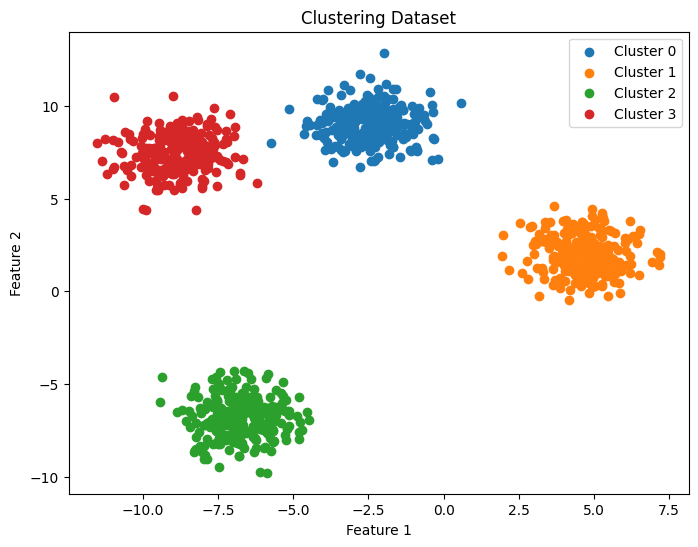

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

# Generate the dataset
num_samples = 1000
num_features = 2
num_clusters = 4

X, y = make_blobs(
    n_samples=num_samples,
    n_features=num_features,
    centers=num_clusters,
    random_state=42
)

# Plot the data
plt.figure(figsize=(8, 6))

# Plot samples for each cluster
for cluster_label in range(num_clusters):
    plt.scatter(X[y == cluster_label, 0], X[y == cluster_label, 1], label=f'Cluster {cluster_label}')

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Dataset')
plt.legend()

# Show the plot
plt.show()


## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the website to scrape
url = 'https://www.worldometers.info/coronavirus/'

# Send a GET request to the website
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the data
table = soup.find('table', {'id': 'main_table_countries_today'})

# Extract table headers
headers = [header.text.strip() for header in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr')[1:]:
    rows.append([data.text.strip() for data in row.find_all('td')])

# Create a Pandas DataFrame from the scraped data
df = pd.DataFrame( rows,columns=headers)

# Filter and select the desired columns
selected_columns = [
    'Country,Other',
    'Continent',
    'Population',
    'TotalCases',
    'NewCases',
    'TotalDeaths',
    'NewDeaths',
    'TotalRecovered',
    'NewRecovered',
    'ActiveCases'
]
df = df[selected_columns]

# Print the resulting DataFrame
print(df)


     Country,Other          Continent Population   TotalCases NewCases   
0    North America      North America             126,648,037     +217  \
1             Asia               Asia             217,286,137   +6,798   
2           Europe             Europe             249,247,865            
3    South America      South America              68,674,084            
4          Oceania  Australia/Oceania              14,309,495            
..             ...                ...        ...          ...      ...   
242         Total:      South America              68,674,084            
243         Total:  Australia/Oceania              14,309,495            
244         Total:             Africa              12,823,223            
245         Total:                                        721            
246         Total:                All             688,989,562   +7,015   

    TotalDeaths NewDeaths TotalRecovered NewRecovered ActiveCases  
0     1,632,544        +1    122,496,199   

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

Original dataset: Counter({0: 945, 1: 55})


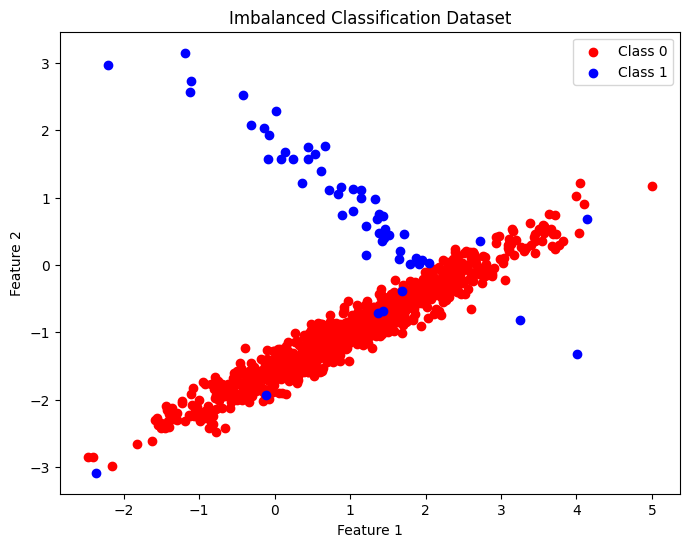

Oversampled dataset: Counter({0: 945, 1: 236})


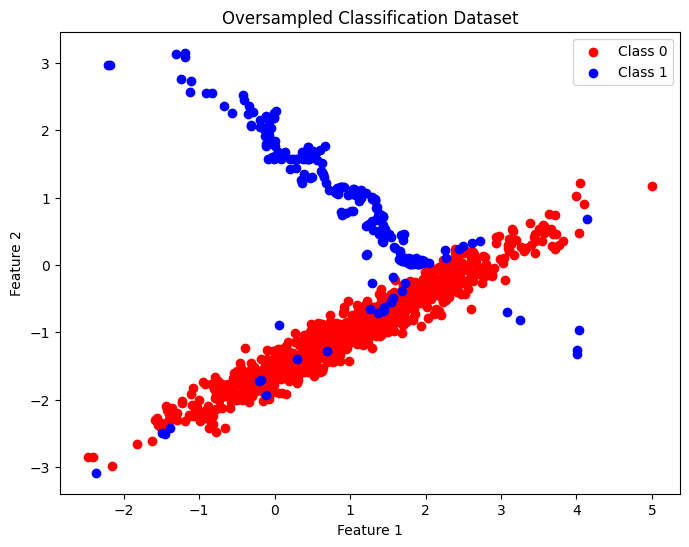

Undersampled dataset: Counter({0: 393, 1: 236})


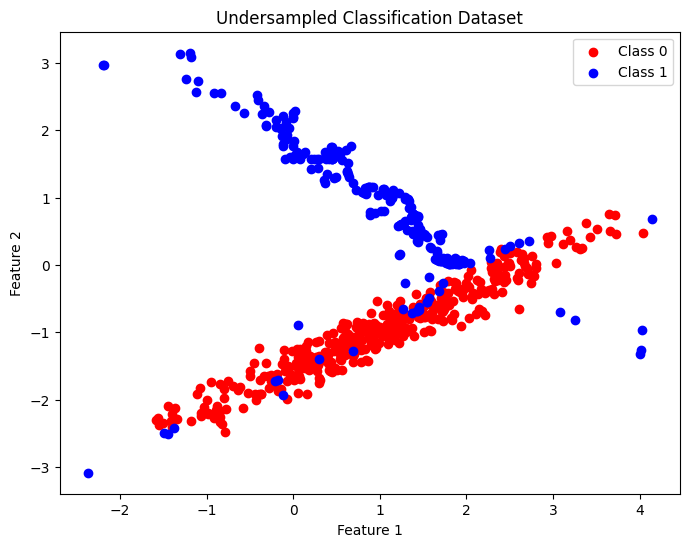

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Set random seed for reproducibility
np.random.seed(42)

# Generate the imbalanced dataset
num_samples = 1000
num_features = 2
num_classes = 2
num_clusters_per_class = 1

X, y = make_classification(
    n_samples=num_samples,
    n_features=num_features,
    n_informative=num_features,
    n_redundant=0,
    n_repeated=0,
    n_classes=num_classes,
    n_clusters_per_class=num_clusters_per_class,
    weights=[0.95, 0.05],  # 5% samples for the minority class
    random_state=42
)

# Verify the number of samples per class
print('Original dataset:', Counter(y))

# Plot the data
plt.figure(figsize=(8, 6))

# Plot samples of class 0
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')

# Plot samples of class 1
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Imbalanced Classification Dataset')
plt.legend()

# Show the plot
plt.show()

# Perform oversampling with SMOTE
oversampler = SMOTE(sampling_strategy=0.25)  # minority class size to 5 times the initial size
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Verify the number of samples after oversampling
print('Oversampled dataset:', Counter(y_oversampled))

# Plot the oversampled data
plt.figure(figsize=(8, 6))

# Plot samples of class 0
plt.scatter(X_oversampled[y_oversampled == 0, 0], X_oversampled[y_oversampled == 0, 1], color='red', label='Class 0')

# Plot samples of class 1
plt.scatter(X_oversampled[y_oversampled == 1, 0], X_oversampled[y_oversampled == 1, 1], color='blue', label='Class 1')

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Oversampled Classification Dataset')
plt.legend()

# Show the plot
plt.show()

# Perform undersampling with RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy=0.6)  # majority class size to 3 times the minority class size
X_undersampled, y_undersampled = undersampler.fit_resample(X_oversampled, y_oversampled)

# Verify the number of samples after undersampling
print('Undersampled dataset:', Counter(y_undersampled))

# Plot the undersampled data
plt.figure(figsize=(8, 6))

# Plot samples of class 0
plt.scatter(X_undersampled[y_undersampled == 0, 0], X_undersampled[y_undersampled == 0, 1], color='red', label='Class 0')

# Plot samples of class 1
plt.scatter(X_undersampled[y_undersampled == 1, 0], X_undersampled[y_undersampled == 1, 1], color='blue', label='Class 1')

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Undersampled Classification Dataset')
plt.legend()

# Show the plot
plt.show()


##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# Create a pandas DataFrame
df = pd.DataFrame(X, columns=iris_data.feature_names)
print("First 5 rows of the DataFrame:")
print(df.head())

# Check for missing values
print("Missing values in the DataFrame:")
print(df.isnull().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the dimensions of the training and testing sets
print("Training set dimensions:", X_train.shape)
print("Testing set dimensions:", X_test.shape)

# Standardize the feature data in the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation on the testing set
X_test_scaled = scaler.transform(X_test)

# Print the first 5 rows of the standardized training set
df_train_scaled = pd.DataFrame(X_train_scaled, columns=iris_data.feature_names)
print("First 5 rows of the standardized training set:")
print(df_train_scaled.head())


First 5 rows of the DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Missing values in the DataFrame:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Training set dimensions: (105, 4)
Testing set dimensions: (45, 4)
First 5 rows of the standardized training set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.323398
1           0.551222         -0.502563           0.717703          0.353032
2           0.671802          0.21